# Plots for the First Ray Inference Experiment
The experiment had the following parameters:
- 'dataset\_size': [6388]
- 'parallelism\_read': [-1, 50, 100, 200]
- 'num\_cpus\_preprocess': [5.5]
- 'num\_cpus\_inference': [5.5]
- 'batch\_size\_preprocess': [8, 16, 32, 64]
- 'batch\_size\_inference': [8, 16, 32, 64]
- 'concurrency': [1, 2, 3, 4, 5]
- 'preserve\_order': [False]

In total, 360 combinations. Datatset: 2024-02-15\_22h39m22s
### Best Throughput
First of all, let's print the best throughput and its combinantion of parameters.

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/home/joan/TFM/ray/rack/e1_rack_metrics_torchscript_embl_inference.csv'
data = pd.read_csv(csv_file)

best_throughput_row = data.loc[data['Throughput (img/sec)'].idxmax()]
    
# Print the best throughput and the corresponding parameters
print("Best Throughput:", best_throughput_row['Throughput (img/sec)'])
print("Corresponding Parameters:")
for col in best_throughput_row.index:
    print(f"{col}: {best_throughput_row[col]}")

Best Throughput: 72.6269718198892
Corresponding Parameters:
Job ID: 5000000
Dataset: 2024-02-15_22h39m22s
Preserve order: False
Parallelism: -1
Num cpus preprocess: 5.5
Num cpus inference: 5.5
Batch size preprocess: 8
Batch size inference: 8
Concurrency: 5
Dataset size (bytes): 1132208
Num records dataset: 6388
Num blocks dataset: 60
Total time: 87.9563038349152
Throughput (img/sec): 72.6269718198892
Total time w/o metadata fetching: 86.3099262714386
Throughput w/o metadata fetching (img/sec): 74.0123445350908


### Parallelism
Average Throughput per different parallelism:

In [102]:
# Group data by the "parallelism_read" value and calculate the mean throughput for each group
average_throughput_by_parallelism = data.groupby("Parallelism")["Throughput (img/sec)"].mean()

print("Average Throughput by Parallelism:")
print(average_throughput_by_parallelism)

Average Throughput by Parallelism:
Parallelism
-1     39.295429
 50    39.575202
 100   37.815851
 200   37.110298
Name: Throughput (img/sec), dtype: float64


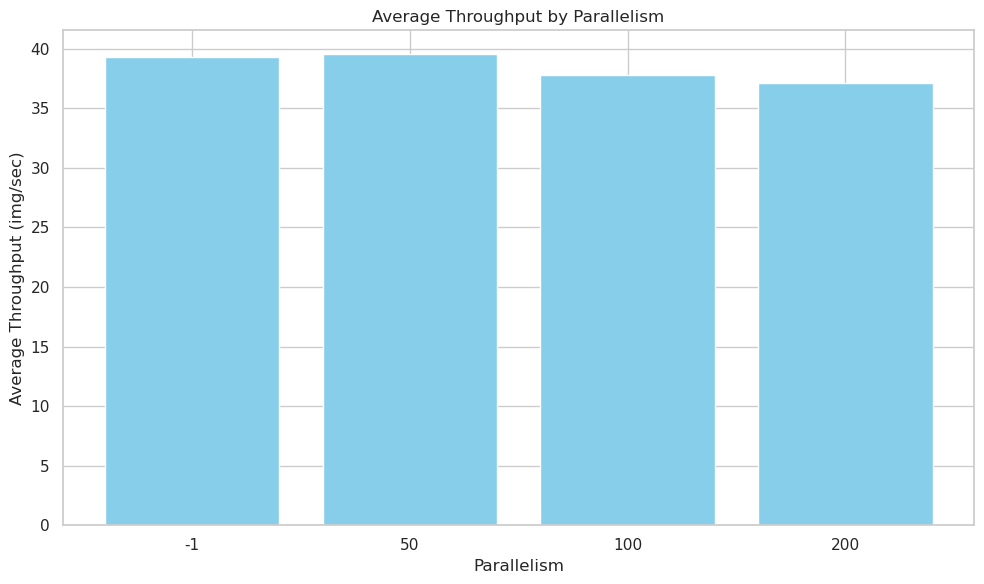

In [103]:
average_throughput_by_parallelism = {
    -1: 39.295429,
    50: 39.575202,
    100: 37.815851,
    200: 37.110298
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.values(), color='skyblue')
plt.xlabel('Parallelism')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Parallelism')
plt.xticks(range(len(average_throughput_by_parallelism)), average_throughput_by_parallelism.keys())
plt.grid(True)
plt.tight_layout()
plt.show()

### Batch size preprocess

In [104]:
# Group data by the "batch size preprocess" value and calculate the mean throughput for each group
average_throughput_by_batch_size_preprocess = data.groupby("Batch size preprocess")["Throughput (img/sec)"].mean()

print("Average Throughput by Batch Size Preprocess:")
print(average_throughput_by_batch_size_preprocess)

Average Throughput by Batch Size Preprocess:
Batch size preprocess
8    39.111946
16   38.365321
32   37.754480
64   38.565032
Name: Throughput (img/sec), dtype: float64


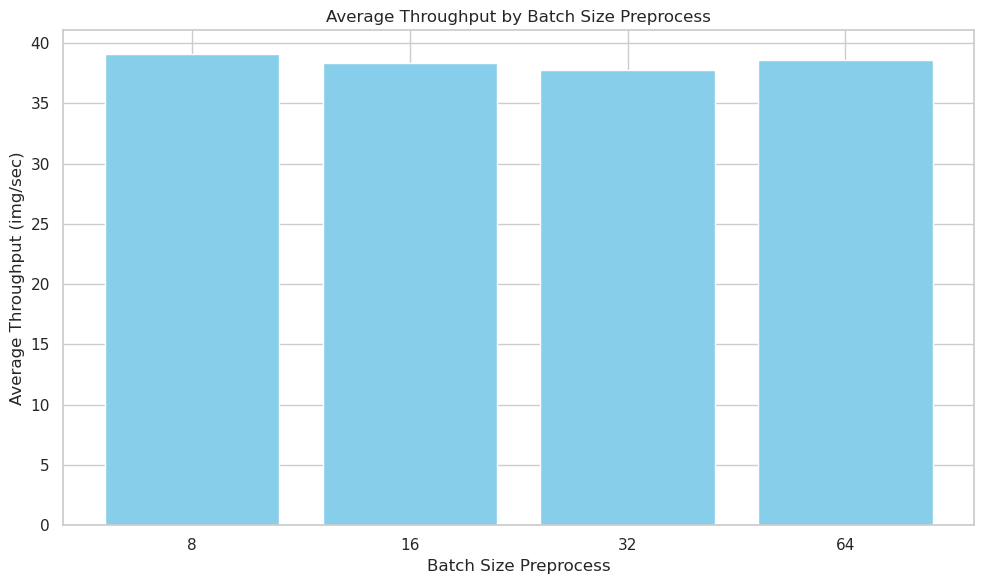

In [105]:
# Batch size preprocess
average_throughput_by_batch_size_preprocess = {
    8: 39.111946,
    16: 38.365321,
    32: 37.754480,
    64: 38.565032
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_batch_size_preprocess)), average_throughput_by_batch_size_preprocess.values(), color='skyblue')
plt.xlabel('Batch Size Preprocess')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Batch Size Preprocess')
plt.xticks(range(len(average_throughput_by_batch_size_preprocess)), average_throughput_by_batch_size_preprocess.keys())
plt.grid(True)
plt.tight_layout()
plt.show()



### Batch Size Inference

In [106]:
# Group data by the "batch size inference" value and calculate the mean throughput for each group
average_throughput_by_batch_size_preprocess = data.groupby("Batch size inference")["Throughput (img/sec)"].mean()

print("Average Throughput by Batch Size Inference:")
print(average_throughput_by_batch_size_preprocess)

Average Throughput by Batch Size Inference:
Batch size inference
8    43.311535
16   40.043643
32   37.048761
64   33.392839
Name: Throughput (img/sec), dtype: float64


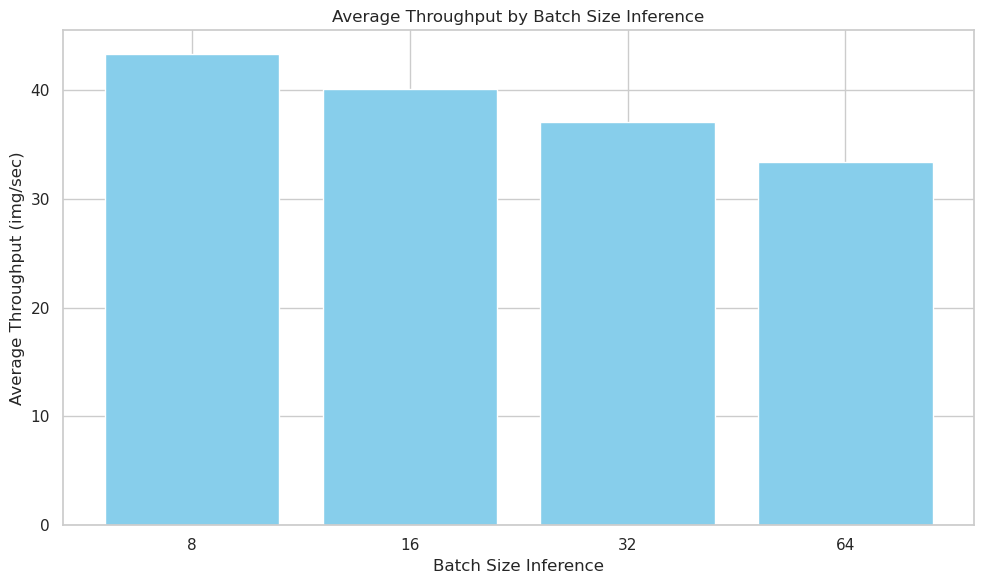

In [107]:
# Batch size inference
average_throughput_by_batch_size_inference = {
    8: 43.311535,
    16: 40.043643,
    32: 37.048761,
    64: 33.392839
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_batch_size_inference)), average_throughput_by_batch_size_inference.values(), color='skyblue')
plt.xlabel('Batch Size Inference')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Batch Size Inference')
plt.xticks(range(len(average_throughput_by_batch_size_inference)), average_throughput_by_batch_size_inference.keys())
plt.grid(True)
plt.tight_layout()
plt.show()


### Concurrency

In [108]:
# Group data by the "concurrency" value and calculate the mean throughput for each group
average_throughput_by_concurrency = data.groupby("Concurrency")["Throughput (img/sec)"].mean()

print("Average Throughput by Concurrency:")
print(average_throughput_by_concurrency)

Average Throughput by Concurrency:
Concurrency
1   14.280143
2   27.629580
3   38.230511
4   52.427390
5   59.678351
Name: Throughput (img/sec), dtype: float64


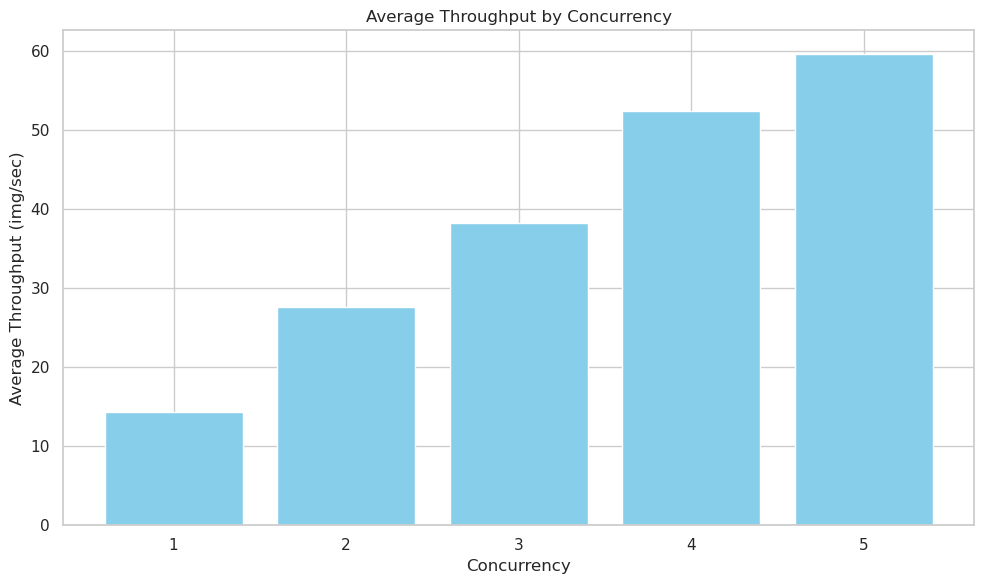

In [109]:
# Concurrency
average_throughput_by_concurrency = {
    1: 14.280143,
    2: 27.629580,
    3: 38.230511,
    4: 52.427390,
    5: 59.678351
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_throughput_by_concurrency)), average_throughput_by_concurrency.values(), color='skyblue')
plt.xlabel('Concurrency')
plt.ylabel('Average Throughput (img/sec)')
plt.title('Average Throughput by Concurrency')
plt.xticks(range(len(average_throughput_by_concurrency)), average_throughput_by_concurrency.keys())
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Parameters and Throughput

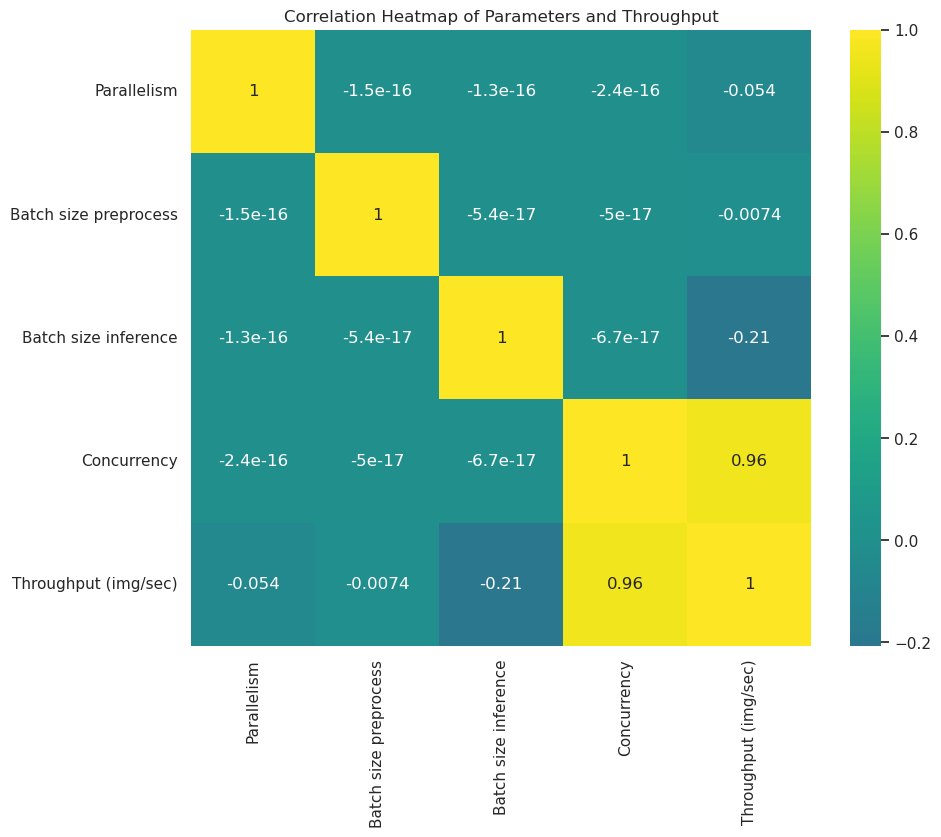

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = '/home/joan/TFM/ray/rack/e1_rack_metrics_torchscript_embl_inference.csv'
data = pd.read_csv(csv_file)

# Select the relevant columns
parameters = ['Parallelism', 'Batch size preprocess', 'Batch size inference', 'Concurrency', 'Throughput (img/sec)']
data_subset = data[parameters]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap of Parameters and Throughput')
plt.show()

### Principal component analysis (PCA)
First, let's take a look at the importance of components

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['Parallelism', 'Batch size preprocess', 'Batch size inference', 'Concurrency', 'Throughput (img/sec)']
X = data[features]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)

# Print the explained variance and cumulative proportion for each PC
print("## Importance of components: ##")
for i, (variance, cumsum) in enumerate(zip(pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()), start=1):
    print(f"PC{i}: Standard deviation = {pca.explained_variance_[i-1]**0.5:.4f}, Proportion of Variance = {variance:.4f}, Cumulative Proportion = {cumsum:.4f}")

## Importance of components: ##
PC1: Standard deviation = 1.4094, Proportion of Variance = 0.3960, Cumulative Proportion = 0.3960
PC2: Standard deviation = 1.0016, Proportion of Variance = 0.2000, Cumulative Proportion = 0.5960
PC3: Standard deviation = 1.0016, Proportion of Variance = 0.2000, Cumulative Proportion = 0.7960
PC4: Standard deviation = 1.0016, Proportion of Variance = 0.2000, Cumulative Proportion = 0.9960
PC5: Standard deviation = 0.1411, Proportion of Variance = 0.0040, Cumulative Proportion = 1.0000


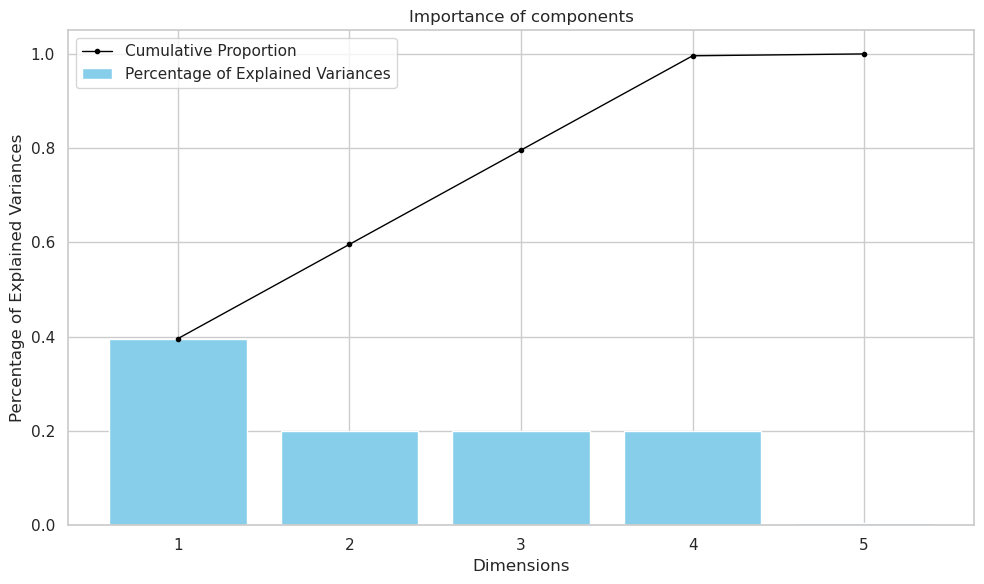

In [112]:
# Proportion of variance explained by each PC
variance = np.array([0.3960, 0.2000, 0.2000, 0.2000, 0.0040])

# Cumulative proportion of variance explained
cumulative_variance = np.array([0.3960, 0.5960, 0.7960, 0.9960, 1.0000])

# Number of PCs
dimensions = np.arange(len(variance)) + 1

plt.figure(figsize=(10, 6))

# Create bar plot for variance explained by each PC
plt.bar(dimensions, variance, color='skyblue', label='Percentage of Explained Variances')

# Create line plot for cumulative variance explained
plt.plot(dimensions, cumulative_variance, color='black', marker='o', linestyle='-', linewidth=1, markersize=3, label='Cumulative Proportion')

# Adding titles and labels
plt.title('Importance of components')
plt.xlabel('Dimensions')
plt.ylabel('Percentage of Explained Variances')
plt.xticks(dimensions) 

# Add legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Now, let's take a look at the Percentage Contribution of Each Variable to Each Principal Component

In [113]:
# Loadings or contributions of the variables to each component
loadings = pca.components_
squared_loadings = np.square(loadings)  # square of loadings

# Total variance per component
total_variance_per_component = np.sum(squared_loadings, axis=1, keepdims=True)

# Percentage contribution of each variable to each component
percentage_contributions = (squared_loadings / total_variance_per_component) * 100

# Creating a DataFrame to display the results neatly
contrib_df = pd.DataFrame(percentage_contributions.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features)

print("Percentage Contribution of Each Variable to Each Principal Component:")

# Set display options
pd.set_option('display.float_format', lambda x: '%.6f' % x) 

print(contrib_df)

Percentage Contribution of Each Variable to Each Principal Component:
                            PC1       PC2       PC3       PC4       PC5
Parallelism            0.153472  0.000000 99.693056  0.000000  0.153472
Batch size preprocess  0.002853  2.039181  0.000018 97.955095  0.002853
Batch size inference   2.236998 93.519925  0.013775  1.992305  2.236998
Concurrency           47.606677  4.440894  0.293151  0.052601 47.606677
Throughput (img/sec)  50.000000  0.000000  0.000000  0.000000 50.000000


/tmp/ipykernel_25527/1224330281.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, label='Percentage Contribution')


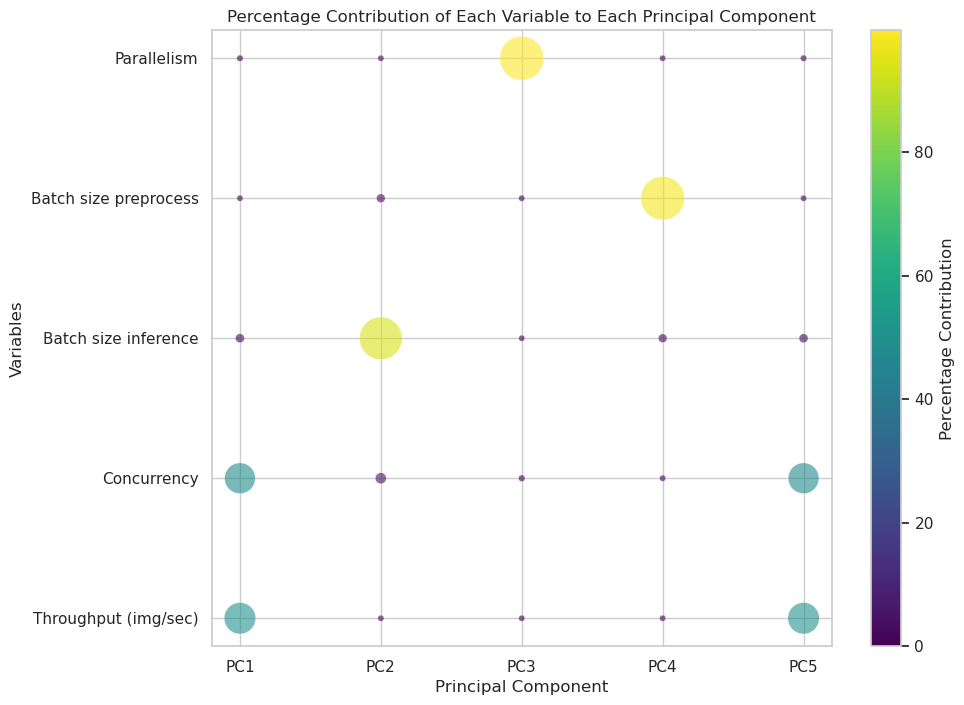

In [114]:
import matplotlib.colors as mcolors

data = {
    'PC1': [0.153472, 0.002853, 2.236998, 47.606677, 50.000000],
    'PC2': [0.000000, 2.039181, 93.519925, 4.440894, 0.000000],
    'PC3': [99.693056, 0.000018, 0.013775, 0.293151, 0.000000],
    'PC4': [0.000000, 97.955095, 1.992305, 0.052601, 0.000000],
    'PC5': [0.153472, 0.002853, 2.236998, 47.606677, 50.000000]
}

index = ['Parallelism', 'Batch size preprocess', 'Batch size inference', 'Concurrency', 'Throughput (img/sec)']

df = pd.DataFrame(data, index=index)

# Melt the DataFrame to work with Seaborn easily
df_melted = df.reset_index().melt(id_vars='index', var_name='Principal Component', value_name='Percentage')

# Create the bubble chart
plt.figure(figsize=(10, 8))
bubble = sns.scatterplot(data=df_melted, 
                         x='Principal Component', 
                         y='index', 
                         size='Percentage', 
                         sizes=(20, 1000), 
                         hue='Percentage', 
                         palette='viridis',  
                         alpha=0.6,
                         legend=False)  

# Add titles and labels
plt.title('Percentage Contribution of Each Variable to Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variables')

# Get the colormap
norm = mcolors.Normalize(vmin=df_melted['Percentage'].min(), vmax=df_melted['Percentage'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add the colorbar to the figure
plt.colorbar(sm, label='Percentage Contribution')

# Show the plot
plt.show()

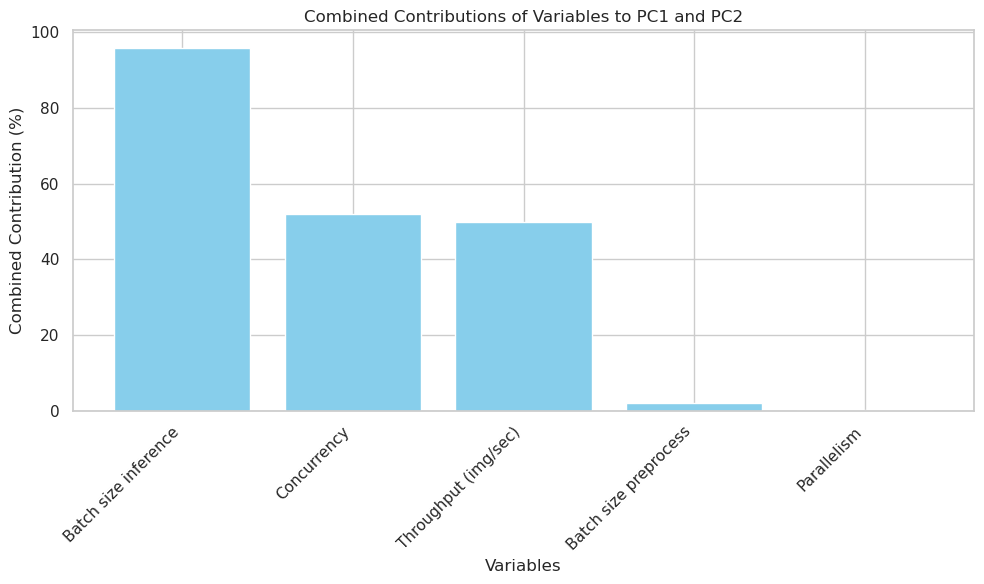

In [115]:
# Calculate the sum of contributions from PC1 and PC2
df['Sum_PC1_PC2'] = df['PC1'] + df['PC2']

# Sort the values if desired
df_sorted = df.sort_values(by='Sum_PC1_PC2', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted['Sum_PC1_PC2'], color='skyblue')

# Adding titles and labels
plt.title('Combined Contributions of Variables to PC1 and PC2')
plt.xlabel('Variables')
plt.ylabel('Combined Contribution (%)')

# Rotate labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

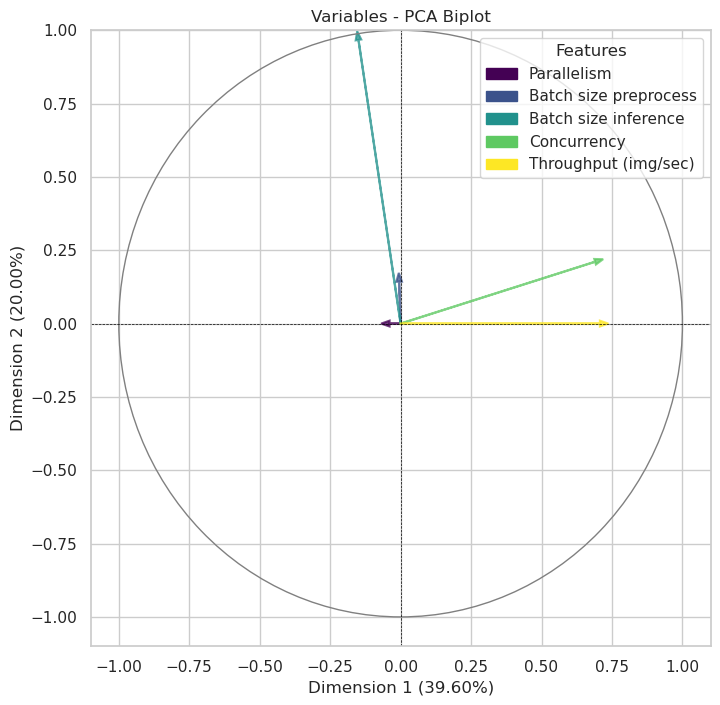

In [117]:
# Create a new figure
plt.figure(figsize=(8, 8))

# Color settings
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))

# Plot the loadings
for i, (comp1, comp2) in enumerate(zip(loadings[0], loadings[1])):
    plt.arrow(0, 0, comp1, comp2, color=colors[i], alpha=0.75, head_width=0.02, head_length=0.03, linewidth=1.5)


# Set limits and draw a circle
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1)
plt.axhline(0, color='black', lw=0.5, linestyle='--')
plt.axvline(0, color='black', lw=0.5, linestyle='--')
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linewidth=1)
plt.gca().add_artist(circle)

# Add gridlines
plt.grid(True)

# Labels and title
plt.xlabel(f"Dimension 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"Dimension 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title('Variables - PCA Biplot')

# Adding a color legend manually
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=colors[i], label=features[i]) for i in range(len(features))]
plt.legend(handles=legend_handles, title="Features")

# Show the plot
plt.show()
